# **Black Scholes Model**
***
The Black Scholes Model allows one to determine the theoretical price of European *(can only be exercised on expiration date)* call and put options.
#### The model is built on 5 variables:
- Volatility
- Underlying common share price
- Exercise price
- Time Decay
- Risk free Rate

<img src="http://education.optionseducation.org/oic_courses/OIC310C/images/pricingModels_01_c.gif" alt="Error loading image" title="Title text">

In [1]:
# Begin by first importing the necessary libraries,
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import time

%matplotlib inline
plt.style.use('ggplot')

## We will define 3 functions:
 1. d1 
 2. d2
 3. BlackScholes - integrates functions d1 and d2
    
Explanations for each input:
 1. S0 - Stock price at time 0
 2. K - Exercise price
 3. r - Risk free interest rate
 4. sigma - Implied Volatility of underlying common stock
 5. T - Time to maturity in trading year
 6. Otype - Specifies if option is a call or a put

In [2]:
def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
 
def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
 
def BlackScholes(type,S0, K, r, sigma, T):
    if type=="C":  # if CALL option
        return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))
    else:          # if PUT option
       return K * np.exp(-r * T) * ss.norm.cdf(-d2(S0, K, r, sigma, T)) - S0 * ss.norm.cdf(-d1(S0, K, r, sigma, T))

### Now we need to define our parameters
Below illustrates a at-the-money call option with 3 years to expiration

In [3]:
S0 = 100.0
K = 100.0
r=0.1
sigma = 0.30
T = 3
Otype='C'

### Run the function!!!

In [4]:
print ("S0\tstock price at time 0:", S0)
print ("K\tstrike price:", K)
print ("r\tcontinuously compounded risk-free rate:", r)
print ("sigma\tvolatility of the stock price per year:", sigma)
print ("T\ttime to maturity in trading years:", T)


t=time.time()
c_BS = BlackScholes(Otype,S0, K, r, sigma, T)
elapsed=time.time()-t
print ("c_BS\tBlack-Scholes price:", c_BS, elapsed)

S0	stock price at time 0: 100.0
K	strike price: 100.0
r	continuously compounded risk-free rate: 0.1
sigma	volatility of the stock price per year: 0.3
T	time to maturity in trading years: 3
c_BS	Black-Scholes price: 33.60448376282812 0.0020055770874023438


### Extra: Suppose we want to demonstrate the effect Time Decay
Let us use the same at-the-money call options, but define 3 time periods to maturity - T1, T2, T3.

We have summarized the data in a simple pandas dataframe


In [40]:
S0 = 100.0
K = 100.0
r=0.1
sigma = 0.30
Otype='C'

# Varying Time Period
T1 = 3 
T2 = 2
T3 = 1

c_BS1 = BlackScholes(Otype,S0, K, r, sigma, T1)
c_BS2 = BlackScholes(Otype,S0, K, r, sigma, T2)
c_BS3 = BlackScholes(Otype,S0, K, r, sigma, T3)

print ("c_BS1\tBlack-Scholes price:", c_BS1)
print ("c_BS2\tBlack-Scholes price:", c_BS2)
print ("c_BS3\tBlack-Scholes price:", c_BS3)

TimeDecay = {'T1':c_BS1, 'T2': c_BS2, 'T3':c_BS3}

df = pd.DataFrame(list(TimeDecay.items()), columns = ['Time', 'Option prices'])
df.set_index('Time' ,inplace = True)
df

c_BS1	Black-Scholes price: 33.60448376282812
c_BS2	Black-Scholes price: 25.97547744468818
c_BS3	Black-Scholes price: 16.73413358238666


,Option prices
Time,
T1,33.604484
T2,25.975477
T3,16.734134


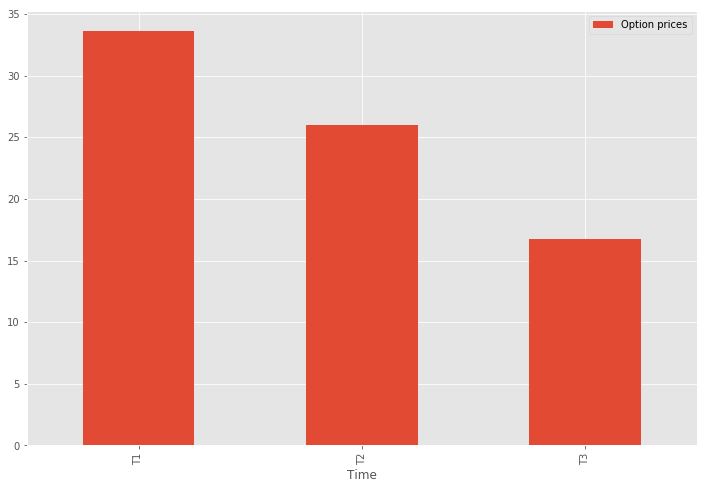

In [43]:
TimeDecayBar = df.plot.bar(figsize = (12,8))
